In [1]:
import numpy as np
from continuous_utils_testing import Distribution, generate_agents, sim, Agent, Tolerance
from generateOpinions import *
import matplotlib.pyplot as plt
import random
import pandas as pd

In [2]:
num_agents = 1000
# opinions = bimodal_opinions(
#     num_agents=num_agents,
#     mean1=-0.5,
#     mean2=0.5,
#     std_dev1=0.1,
#     std_dev2=0.1,
#     lower_bound=-1,
#     upper_bound=1,
#     proportion_first_mode=0.5 )

# opinions = normal_opinions(
#     num_agents=200,
#     mean=0,
#     std_dev=0.25,
#     lower_bound=-1,
#     upper_bound=1
# )

# opinions = trimodal_opinions(mean1=-0.5, mean2=0, mean3=0.5, std_dev=0.1, num_agents=1000, lower_bound=-1, upper_bound=1)


# steps = [(-0.6, 250), (0, 500), (0.6, 250)]  # Mean opinion and size for each step
# num_agents = 1000
# lower_bound = -1
# upper_bound = 1

# opinions = step_opinions(steps, num_agents, lower_bound, upper_bound)

# start = 0  # Starting point of the random walk in the middle of the opinion space
# num_agents = 1000
# step_size = 0.1  # Determines how much each step in the random walk can change

# opinions = random_walk_opinions(start, num_agents, step_size)

saved_opinions = pd.read_csv('opinions.csv', index_col=0)

opinions = saved_opinions['0'].to_list()

all_agents = []

for percent_low in [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]:
    num_extra_low = int(num_agents*percent_low)
    num_same = int(num_agents*(1-percent_low)/2)
    num_high = num_agents - num_extra_low - num_same

    weights = []

    for i in range(0, num_extra_low):
        weights.append(np.array([8, 1, 1]))

    for i in range(0, num_same):
        weights.append(np.array([1, 1, 1]))

    for i in range(0, num_high):
        weights.append(np.array([1, 1, 8]))

    random.shuffle(weights)
    print(len(weights))

    agents = generate_agents(opinions, weights)
    all_agents.append((percent_low, agents))

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


In [12]:
opinions = [agent.opinions[0] for agent in agents.values()]
len(opinions)

1000

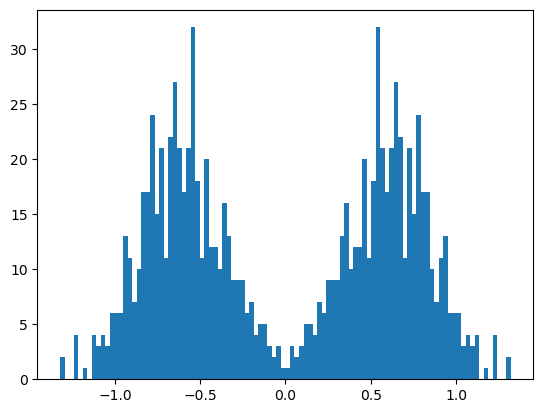

In [13]:
import matplotlib.pyplot as plt
plt.hist(opinions, bins=100)
plt.show()

In [5]:
all_agents_post_sim = []
for agents in all_agents:
    print(f"simulating low preference percent {agents[0]}")
    all_agents_post_sim.append((agents[0], sim(agents[1], 1000, 0.1)))

# import multiprocessing

# def sim_wrapper(key, agents):
#     return (key, sim(agents, 1000, 0.1))

# with multiprocessing.Pool() as pool:
#     agent_results = []
#     for key, agents in all_agents:
#         result = pool.apply_async(sim_wrapper, args=(key, agents))
#         agent_results.append(result)
    
#     # Retrieve results
#     agent_results = [result.get() for result in agent_results]

iteration: 0


KeyboardInterrupt: 

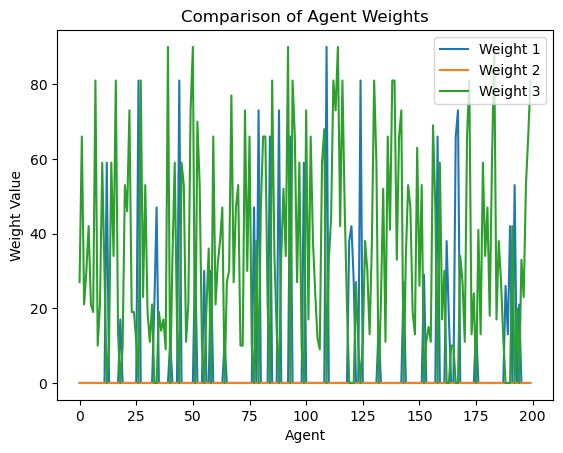

In [6]:
# Extract weights for each agent
weights_per_agent = [agent.strategy_weights for agent in agents.values()]

# Transpose the list so that each weight index corresponds to one agent
weights_per_dimension = list(map(list, zip(*weights_per_agent)))

# Plot each dimension of weights for all agents
for i, weights in enumerate(weights_per_dimension):
    plt.plot(range(len(agents)), weights, label=f'Weight {i+1}')

plt.xlabel('Agent')
plt.ylabel('Weight Value')
plt.title('Comparison of Agent Weights')
plt.legend()
plt.show()

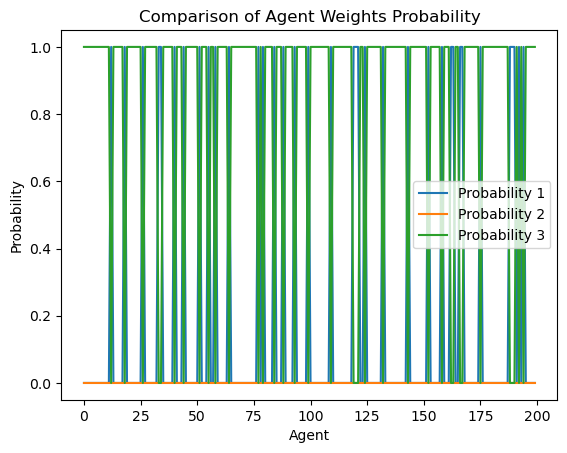

In [7]:
probabilities_per_agent = []
for agent in agents.values():
    total_weight = sum(agent.strategy_weights)
    probabilities = [weight / total_weight for weight in agent.strategy_weights]
    probabilities_per_agent.append(probabilities)

# Transpose the list so that each probability index corresponds to one agent
probabilities_per_dimension = list(map(list, zip(*probabilities_per_agent)))

# Plot each dimension of probabilities for all agents
for i, probabilities in enumerate(probabilities_per_dimension):
    plt.plot(range(len(agents)), probabilities, label=f'Probability {i+1}')

plt.xlabel('Agent')
plt.ylabel('Probability')
plt.title('Comparison of Agent Weights Probability')
plt.legend()
plt.show()

In [8]:
# Threshold for probability
threshold = 0.8

# Count the number of agents with weight probability above the threshold for each weight
counts_above_threshold = [sum(1 for probability in probabilities if probability > threshold) for probabilities in probabilities_per_dimension]

print("Counts above threshold:", counts_above_threshold)

Counts above threshold: [36, 0, 164]
